05/03/2024

# Recreación Letter Lorenzo

### Ecuación de la dinámica entre los agentes
$$ \dot{x}_i(t) = \mu_i x_i(t) + \sigma_i x_i(t) \xi_i(t) + \frac{1}{G} \sum_{j \ne i} [\alpha_j x_j(t) - \alpha_i x_i(t)]$$
Movimiento Browniano con ruido blanco y aporte de la cooperación

Simplificamos nuestro estudio para el caso $G=2$
#### Efecto de la cooperación:
$$g_{\alpha_1 \mid \alpha_2}^{(1)}-g_{0 \mid 0}^{(1)}=-\frac{\alpha_1}{2}+\frac{\sqrt{\alpha_1 \alpha_2}}{2} \frac{K_{-1+\gamma+\frac{\alpha_2-\alpha_1}{2 \sigma^2}}\left(\frac{\sqrt{\alpha_1 \alpha_2}}{\sigma^2}\right)}{K_{-\gamma+\frac{\alpha_2-\alpha_1}{2 \sigma^2}}\left(\frac{\sqrt{\alpha_1 \alpha_2}}{\sigma^2}\right)}$$

In [1]:
# Importación de librerías
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
# Efecto de la cooperación:
def cooperation_effect(alfa1, alfa2, gamma, sigma):
    return -alfa1/2 + np.sqrt(alfa1*alfa2)/2 * (
        (sp.special.kv(-1+gamma+(alfa2-alfa1)/(2*sigma**2), np.sqrt(alfa1*alfa2)/sigma**2))/(
        sp.special.kv(  -gamma+(alfa2-alfa1)/(2*sigma**2), np.sqrt(alfa1*alfa2)/sigma**2)))


### Gráfica 1a
El efecto (favorable) de la cooperación crece con el aumento de las fluctuaciones ($\sigma$). Sin embargo, para $\alpha_2$ fija, el comportamiento de $\alpha_1$ no es monótono.

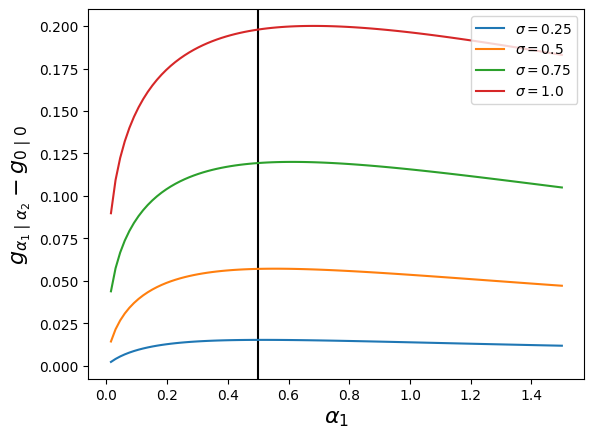

In [3]:
# Parámetros
alfa1 = np.linspace(0.0, 1.5, 100)[1:]
alfa2 = 0.5
sigma = 0.75
gamma = 0.0

plt.axvline(alfa2, c='black')
for sigma in np.linspace(0.25, 1, 4):
    # Efecto (favorable) de la cooperación.
    g_coop = cooperation_effect(alfa1, alfa2, gamma, sigma)

    plt.plot(alfa1, g_coop, label = fr"$\sigma = {sigma}$")

plt.xlabel(r"$\alpha_1$", fontsize = 16)
plt.ylabel(r"$g_{\alpha_1 \mid \alpha_2}-g_{0 \mid 0}$", fontsize = 16)
plt.legend(loc=1)
plt.show()


### Gráfica 1b
Calculamos los parámetros $\alpha$ óptimos a partir del parámetro $\alpha$ adoptado por el otro agente.

Reducir la amplitud del ruido hace que las curvas se acequen más a la diagonal, pero nunca la sobrepasan. Es decir, el $\alpha$ óptimo es siempre mayor que el $\alpha$ del compañero.

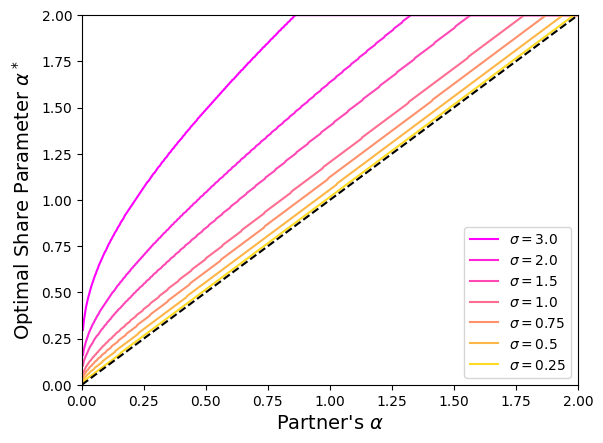

In [4]:
# Parámetros
n = 500
alfa1 = np.linspace(0.0, 2.0, n)[1:]
partner_alfa = np.linspace(0.0, 2.0, n)[1:]
sigma_values = [3.0, 2.0, 1.5, 1.0, 0.75, 0.5, 0.25]
gamma = 0.0

cmap = plt.get_cmap('spring')
for i, sigma in  enumerate(sigma_values):
    optimal_alfa = np.zeros(n-1)
    for j, alfa2 in enumerate(partner_alfa):
        optimal_alfa[j] = alfa1[np.argmax(cooperation_effect(alfa1, alfa2, gamma, sigma))]
    plt.plot(partner_alfa, optimal_alfa, label = rf"$\sigma = {sigma}$", 
             color = cmap(i/len(sigma_values)))
        
plt.xlim(0,2)
plt.ylim(0,2)
plt.xlabel(r"Partner's $\alpha$", fontsize = 14)
plt.ylabel(r"Optimal Share Parameter $\alpha^*$", fontsize = 14)
plt.legend()

# Diagonal para referencia
plt.plot([0,2], [0,2], ls='--', color='black')
plt.show()


### Gráfica 1c
Diferencia en el valor de $\alpha$ de un individuo después de que que ambos individuos hayan optimizado asíncronamente su $\alpha$
$$ \Delta \alpha = \alpha_\gamma^* [\alpha_{-\gamma}^*(\alpha)] $$

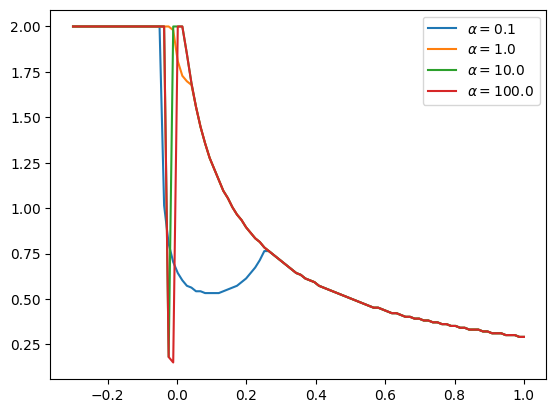

In [5]:
# Parámetros
sigma = 1.5 # no dicen cual es este valor en la carta!!


n = 200

alfa1 = np.linspace(0.0, 2.0, n)[1:]
alfa2 = np.linspace(0.0, 2.0, n)[1:]

m = 100
optimal_alfa1 = np.zeros(m)
gamma_values = np.linspace(-.3, 1, m)
for initial_alfa1 in [.1, 1., 10., 100.]:
    for i, gamma in  enumerate(gamma_values):
        optimal_alfa2 = alfa2[np.argmax(cooperation_effect(initial_alfa1, alfa2, gamma, sigma))]
        optimal_alfa1[i] = alfa1[np.argmax(cooperation_effect(alfa1, optimal_alfa2, gamma, sigma))]

    # print(optimal_alfa1, optimal_alfa2)
    plt.plot(gamma_values, optimal_alfa1, label = rf'$\alpha = {initial_alfa1}$')

plt.legend()
plt.show()

22/07/2024

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6832\3492173707.py:4: RuntimeWarning: invalid value encountered in divide
  (sp.special.kv(-1+gamma+(alfa2-alfa1)/(2*sigma**2), np.sqrt(alfa1*alfa2)/sigma**2))/(


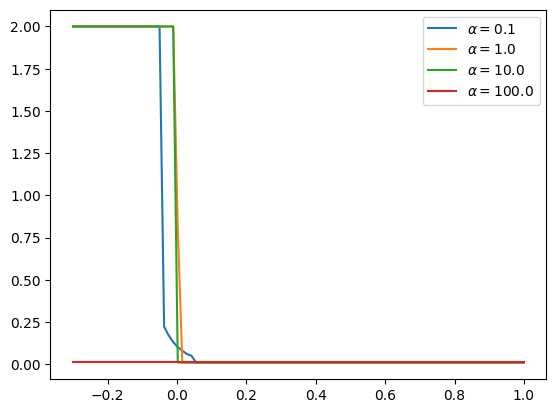

In [6]:
# Parámetros
sigma = .2 # no dicen cual es este valor en la carta!!


n = 200

alfa1 = np.linspace(0.0, 2.0, n)[1:]
alfa2 = np.linspace(0.0, 2.0, n)[1:]

m = 100

optimal_alfa1 = np.zeros(m)
optimal_alfa2_array = np.zeros(m)
gamma_values = np.linspace(-.3, 1, m)
for initial_alfa1 in [.1, 1., 10., 100.]:
    for i, gamma in  enumerate(gamma_values):
        optimal_alfa2 = alfa2[np.argmax(cooperation_effect(initial_alfa1, alfa2, -gamma, sigma))]
        optimal_alfa1[i] = alfa1[np.argmax(cooperation_effect(alfa1, optimal_alfa2, gamma, sigma))]
        optimal_alfa2_array[i]  = optimal_alfa2

    # print(optimal_alfa1, optimal_alfa2)
    plt.plot(gamma_values, optimal_alfa2_array, label = rf'$\alpha = {initial_alfa1}$')

plt.legend()
plt.show()

26
/07/2024

## Agent model 

In [7]:
N = 2 # Número de agentes
x = np.ones(N) * 10
chi = np.zeros(N) * 10
a = np.ones(N) * 0.2



In [8]:
steps = 1000
time = range(steps)
X = np.zeros((steps, N))
rel_growth_rate = np.zeros((steps, N))

x_old = x
for i in range(steps):
    chi = np.random.normal(5, 1, N)
    x = x*chi *(1-a) + np.mean(a*x*chi)
    
    X[i] = x
    rel_growth_rate[i] = (x-x_old)/x_old

    x_old = x


C:\Users\Usuario\AppData\Local\Temp\ipykernel_6832\460323446.py:9: RuntimeWarning: overflow encountered in multiply
  x = x*chi *(1-a) + np.mean(a*x*chi)
C:\Users\Usuario\AppData\Roaming\Python\Python312\site-packages\numpy\_core\_methods.py:127: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_6832\460323446.py:12: RuntimeWarning: invalid value encountered in subtract
  rel_growth_rate[i] = (x-x_old)/x_old


C:\Users\Usuario\AppData\Roaming\Python\Python312\site-packages\matplotlib\ticker.py:2119: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


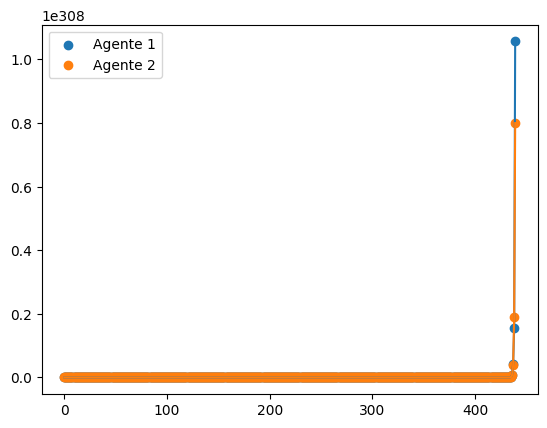

In [9]:
for n in range(N):
    plt.scatter(time, X[:,n], label=f"Agente {n+1}")
plt.plot(X)
plt.legend()

In [10]:
N = 2 # Número de agentes
x = np.ones(N) * 10
chi = np.zeros(N) * 10
a = np.ones(N) * 0.2



array([[ 0.08364871,  0.35567189],
       [ 0.11235623, -0.21524323],
       [ 0.05950807,  0.07445601],
       ...,
       [ 0.12903841,  0.42817475],
       [-0.05409924, -0.17050275],
       [-0.14518855,  0.30784614]])

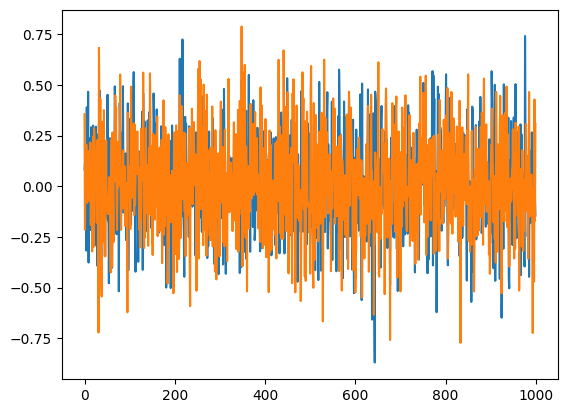

In [11]:
steps = 1000
time = range(steps)
X = np.zeros((steps, N))
rel_growth_rate = np.zeros((steps, N))

x_old = x
for i in range(steps):
    chi = np.random.normal(1, 0.25, N)
    x = x_old*chi *(1-a) + np.mean(a*x_old*chi)
    
    X[i] = x
    rel_growth_rate[i] = (x-x_old)/x_old

    x_old = x


plt.plot(rel_growth_rate)
rel_growth_rate


In [12]:
X[-1]

array([6.15921231e-08, 4.56590094e-08])

## FIG. S1

In [13]:
N = 3 # Número de agentes
x = np.ones(N) * 1000
chi = np.zeros(N)
a = np.ones(N) * 0.5
a_defection = np.zeros(N)
sigma = .2
mu = 1.01

# Todos los agentes cooperan igual excepto el 1º, que es el que vamos cambiando
a[0] = 0.9



In [14]:
steps = 10000
time = range(steps)
X = np.zeros((steps, N))
X
rel_growth_rate = np.zeros((steps, N))

x_old = x
x_defection_old = x
for i in time:
    chi = np.random.normal(mu, sigma, N)
    x = x_old*chi *(1-a) + np.mean(a*x_old*chi)
    x_defection = x_defection_old*chi 
    X[i] = x
    rel_growth_rate[i] = (x-x_defection)/x

    x_old = x
    x_defection_old = x

array([ 0.0056103 ,  0.1408435 , -0.11235025])

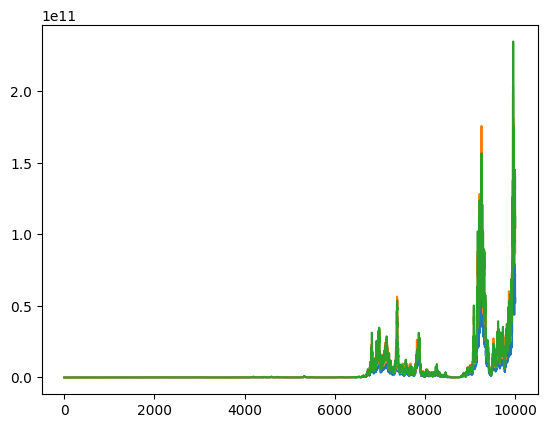

In [15]:
plt.plot(X)

rel_growth_rate[-1]

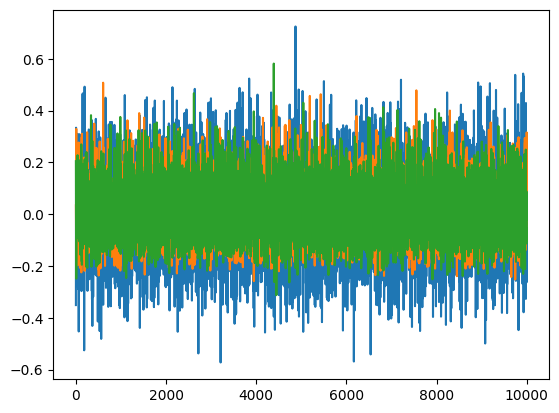

In [16]:
plt.plot(rel_growth_rate)